### 1. Import required libraries

In [729]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from pickle import dump
from pickle import load

### 2. Import Data

In [730]:
sk_data = datasets.load_wine()
print(sk_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [731]:
wine_df = pd.DataFrame(data=sk_data.data,columns=sk_data.feature_names)
wine_df["target"] = sk_data.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### 3. Data Understanding

In [732]:
wine_df.shape

(178, 14)

In [733]:
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [734]:
wine_df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int32
dtype: object

In [735]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [736]:
wine_df.nunique()

alcohol                         126
malic_acid                      133
ash                              79
alcalinity_of_ash                63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
od280/od315_of_diluted_wines    122
proline                         121
target                            3
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

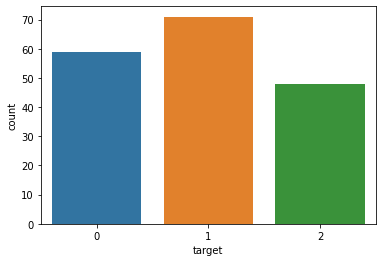

In [737]:
sns.countplot(x="target",hue=None,data=wine_df,)

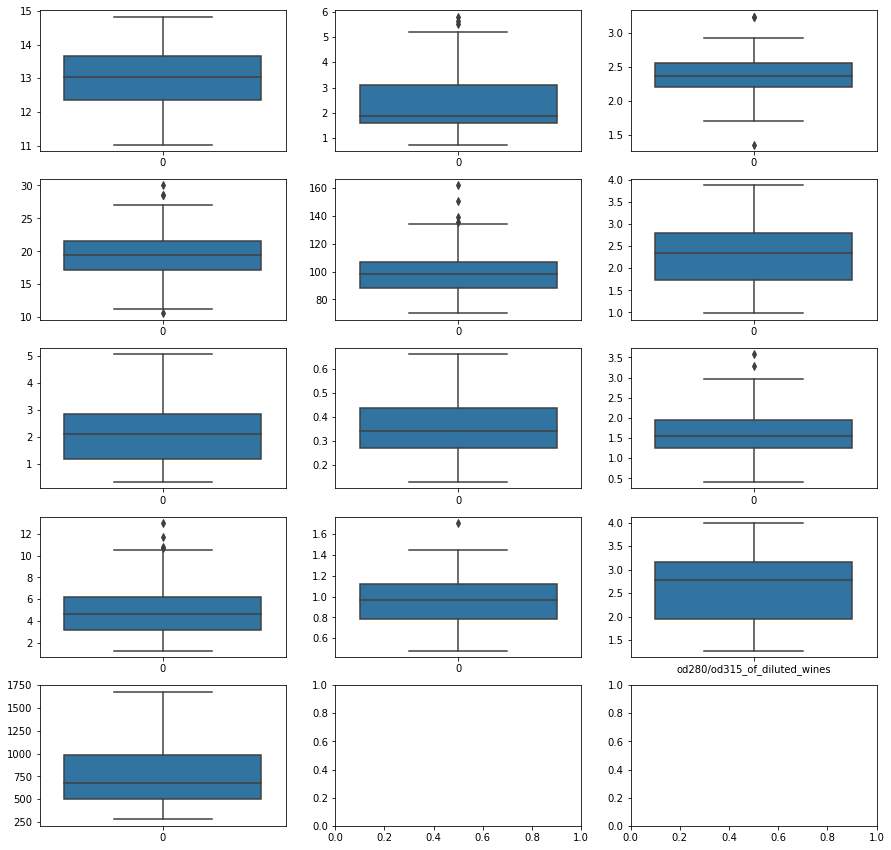

In [738]:
fig, ax = plt.subplots(5,3,figsize=(15,15))
sns.boxplot(data=wine_df.alcohol,ax=ax[0,0])
sns.boxplot(data=wine_df.malic_acid,ax=ax[0,1])
sns.boxplot(data=wine_df.ash,ax=ax[0,2])
sns.boxplot(data=wine_df.alcalinity_of_ash,ax=ax[1,0])
sns.boxplot(data=wine_df.magnesium,ax=ax[1,1])
sns.boxplot(data=wine_df.total_phenols,ax=ax[1,2])
sns.boxplot(data=wine_df.flavanoids,ax=ax[2,0])
sns.boxplot(data=wine_df.nonflavanoid_phenols,ax=ax[2,1])
sns.boxplot(data=wine_df.proanthocyanins,ax=ax[2,2])
sns.boxplot(data=wine_df.color_intensity,ax=ax[3,0])
sns.boxplot(data=wine_df.hue,ax=ax[3,1])
sns.boxplot(data=wine_df.iloc[:,11:12],ax=ax[3,2])
sns.boxplot(data=wine_df.proline,ax=ax[4,0])
plt.show()

### 4. Data Preparation

In [739]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### 5. Model Building

In [740]:
X = wine_df.drop(labels="target",axis=1)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [741]:
y = wine_df[["target"]]
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [742]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=123,shuffle=True)
print(X_train.shape,X_test.shape)

(142, 13) (36, 13)


In [743]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
142,13.52,3.17,2.72,23.5,97.0,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
72,13.49,1.66,2.24,24.0,87.0,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472.0
114,12.08,1.39,2.50,22.5,84.0,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385.0
148,13.32,3.24,2.38,21.5,92.0,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650.0


### 6. Model Training

In [744]:
dt_model = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=None)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

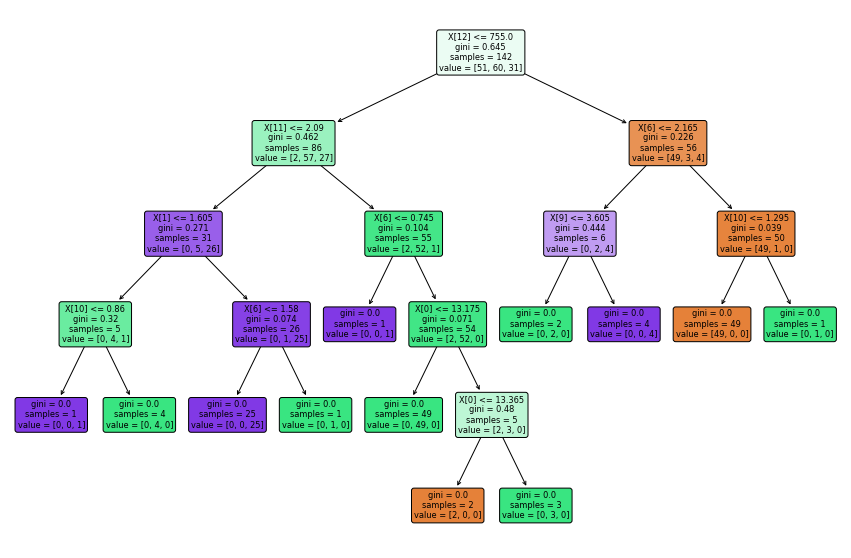

In [745]:
plt.figure(figsize=(15,10))
plot_tree(dt_model,filled=True,rounded=True)
plt.show()

### 7. Model Testing

In [746]:
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

### 8. Model Evluation

#### 8.1 Training Data

In [747]:
print("Accuracy Score            : ",accuracy_score(y_train,y_pred_train))
print("Confusion Matrix          : \n",confusion_matrix(y_train,y_pred_train))
print("Classification Report     : \n",classification_report(y_train,y_pred_train))

Accuracy Score            :  1.0
Confusion Matrix          : 
 [[51  0  0]
 [ 0 60  0]
 [ 0  0 31]]
Classification Report     : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        31

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



#### 8.2 Test Data

In [748]:
print("Accuracy Score            : ",accuracy_score(y_test,y_pred_test))
print("Confusion Matrix          : \n",confusion_matrix(y_test,y_pred_test))
print("Classification Report     : \n",classification_report(y_test,y_pred_test))

Accuracy Score            :  0.9722222222222222
Confusion Matrix          : 
 [[ 8  0  0]
 [ 1 10  0]
 [ 0  0 17]]
Classification Report     : 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00        17

    accuracy                           0.97        36
   macro avg       0.96      0.97      0.96        36
weighted avg       0.98      0.97      0.97        36



### 9. Model Deployement

In [750]:
dump(dt_model,open("wine_analysis.pkl","wb"))

In [751]:
dt_model1 = load(open("wine_analysis.pkl","rb"))

In [752]:
y_pred_test1 = dt_model1.predict(X_test)

In [753]:
print("Accuracy Score            : ",accuracy_score(y_test,y_pred_test1))
print("Confusion Matrix          : \n",confusion_matrix(y_test,y_pred_test1))
print("Classification Report     : \n",classification_report(y_test,y_pred_test1))

Accuracy Score            :  0.9722222222222222
Confusion Matrix          : 
 [[ 8  0  0]
 [ 1 10  0]
 [ 0  0 17]]
Classification Report     : 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00        17

    accuracy                           0.97        36
   macro avg       0.96      0.97      0.96        36
weighted avg       0.98      0.97      0.97        36

